In [1]:
   
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!

In [2]:
symbol ="AAPL"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-01-01",end="2021-02-05")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]
rsi = talib.RSI(data["Close"])
data_frames_separate[0]


,Date,Open,High,Low,Close
Date,,,,,
2018-12-31,17896.0,38.653761,38.856137,38.153916,38.461140
2019-01-02,17898.0,37.766231,38.731784,37.605305,38.505024
2019-01-03,17899.0,35.106087,35.530346,34.623312,34.669640
2019-01-04,17900.0,35.240192,36.220374,35.062200,36.149662
2019-01-07,17903.0,36.256950,36.288648,35.574236,36.069202
...,...,...,...,...,...
2021-01-29,18656.0,135.627328,136.535974,130.015718,131.763107
2021-02-01,18659.0,133.550432,135.178005,130.734633,133.939850
2021-02-02,18660.0,135.527476,136.106612,134.409152,134.788589


In [61]:

data_frames_separate[0]["RSI"]= talib.RSI(data_frames_separate[0]["Close"])
data_frames_separate[0]['Signal'] = 0.0
data_frames_separate[0]['Signal'] = np.where( (data_frames_separate[0]["RSI"]> 75) | (data_frames_separate[0]["RSI"] < 30), 1.0, 0.0)# buraya ekle bir sey sifir ver sadece rsi 70 ise gibi
data_frames_separate[0]['Position'] = data_frames_separate[0]['Signal'].diff()

# (data_frames_separate[0]["RSI"] < 75)
#(data_frames_separate[0]["RSI"] < 30)
#list(data_frames_separate[0]['Signal'])

In [62]:
# Signal=[]
# for i in range(data_frames_separate[0].shape[0]):
#    if (data_frames_separate[0]["RSI"][i] <30) | (data_frames_separate[0]["RSI"][i]>75) :
#      Signal.append((i,data_frames_separate[0]["RSI"][i]))
        
# Signal

    

In [63]:
data_frames_separate[0].shape[0]

529

In [69]:
def plot_all(num):
  #figure, ax_rsi = plt.subplots(nrows=2, ncols=1)
  #fig.set_size_inches((12, 5))
    
    #fig, ax_rsi = plt.subplots(figsize=(12, 5)

  #fig, ax_rsi = plt.subplots(figsize=(12, 10))

  fig = plt.figure(figsize=(12,8))
  gs = gridspec.GridSpec(2, 1, height_ratios = [2,1])
  ax_rsi1= plt.subplot(gs[0])   
  plt.title(num_name[num])
  candlestick_ohlc(ax_rsi1,data_frames_separate[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
#     # plot ‘buy’ signals
  
  ax_rsi1.plot(data_frames_separate[0][data_frames_separate[0]['Position'] == 1].index, 
             data_frames_separate[0]['Close'][data_frames_separate[0]['Position'] == 1], 
              '^', markersize = 10, color = 'g', label = 'buy')
  
    # plot ‘sell’ signals
  ax_rsi1.plot(data_frames_separate[0][data_frames_separate[0]['Position'] == -1].index, 
             data_frames_separate[0]['Close'][data_frames_separate[0]['Position'] == -1], 
             'v', markersize = 10, color = 'r', label = 'sell')
 
  ax_rsi= plt.subplot(gs[1])
    
  ax_rsi.plot(data.index, [75] * len(data.index))
  ax_rsi.plot(data.index, [30] * len(data.index))
  ax_rsi.plot(data.index, rsi)

  legend_labels= ["overbought", "oversold","rsi"]
  ax_rsi.legend(legend_labels,loc = 2)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_rsi.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_rsi1.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_rsi1.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_rsi.axhline(20, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_rsi1.set_ylabel("Price ($)")
  ax_rsi.set_ylabel("% RSI")
# plot ‘buy’ signals
  
  ax_rsi.plot(data_frames_separate[0][data_frames_separate[0]['Position'] == 1].index, 
              data_frames_separate[0]['RSI'][data_frames_separate[0]['Position'] == 1], 
               '^', markersize = 10, color = 'g', label = 'buy')
      # plot ‘sell’ signals
  
    
  ax_rsi.plot(data_frames_separate[0][data_frames_separate[0]['Position'] == -1].index, 
             data_frames_separate[0]['RSI'][data_frames_separate[0]['Position'] == -1], 
            'v', markersize = 10, color = 'r', label = 'sell')



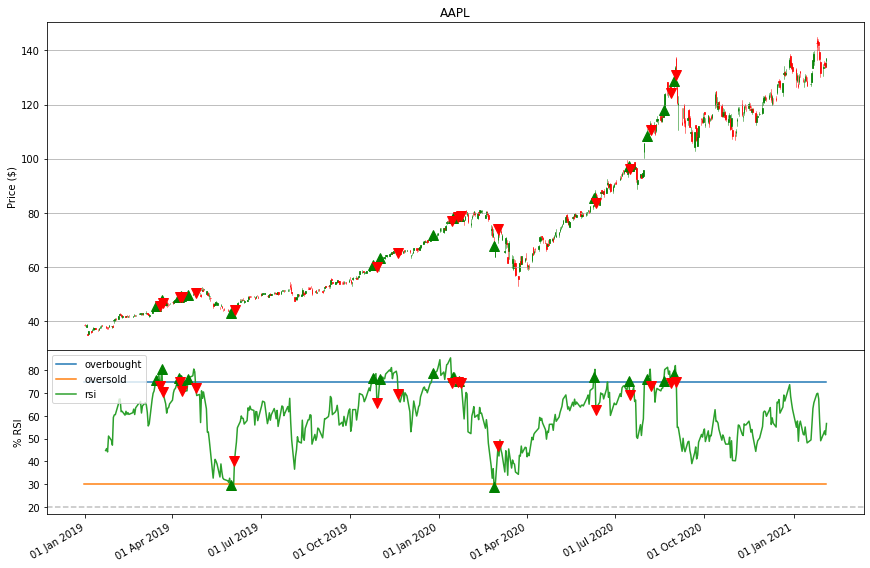

In [70]:
plot_all(0)

In [32]:
section = None
sections = []
for i in range(len(rsi)): 
    if rsi[i] < 30:
        section = 'oversold'
    elif rsi[i] > 70:
        section = 'overbought'
    else:
        section = None
    sections.append(section)

In [33]:
trades = []
for i in range(1,len(sections)):
    trade = None
    if sections[i-1] == 'oversold' and sections[i] == None:
        trade = True
    if sections[i-1] == 'overbought' and sections[i] == None:
        trade = False
    trades.append(trade)

In [34]:
acp = data['Close'][len(data['Close'])-len(trades):].values
profit = 0
qty = 10
for i in range(len(acp)-1):
    true_trade = None
    if acp[i] < acp[i+1]:
        true_trade = True
    elif acp[i] > acp[i+1]:
        true_trade = False
    if trades[i] == true_trade:
        profit += abs(acp[i+1] - acp[i]) * qty
    elif trades[i] != true_trade:
        profit += -abs(acp[i+1] - acp[i]) * qty

In [23]:
print(profit)

-29679.59945678711


In [3]:
# def rsi_test():
#     # Window length for moving average
#     window_length = 14

#     # Dates
#     start = dt.datetime(2019, 1, 1)
#     end = dt.datetime(2020, 1, 1)

#     # Get data
#     try:
#         data = pdr.DataReader('FB', 'yahoo', start, end)
#         # Get just the close
#         close = data['Adj Close']
#         # Get the difference in price from previous step
#         delta = close.diff()
#         # Get rid of the first row, which is NaN since it did not have a previous
#         # row to calculate the differences
#         delta = delta[1:]
#     except ConnectionError:
#         print("ConnectionError")

#     # Make the positive gains (up) and negative gains (down) Series
#     up, down = delta.copy(), delta.copy()
#     up[up < 0] = 0
#     down[down > 0] = 0

#     # Calculate the EWMA # this style is for older pandas version  virtual env do this with pandas 0.15!
#     #roll_up1 = pd.stats.moments.ewma(up, window_length)
#     #roll_down1 = pd.stats.moments.ewma(down.abs(), window_length)
    
#     roll_up1 = pd.ewma(up, window_length)
#     roll_down1 = pd.ewma(down.abs(), window_length)
    

#     # Calculate the RSI based on EWMA
#     RS1 = roll_up1 / roll_down1
#     RSI1 = 100.0 - (100.0 / (1.0 + RS1))

#     # Calculate the SMA
#     roll_up2 = pd.rolling_mean(up, window_length)
#     roll_down2 = pd.rolling_mean(down.abs(), window_length)

#     # Calculate the RSI based on SMA
#     RS2 = roll_up2 / roll_down2
#     RSI2 = 100.0 - (100.0 / (1.0 + RS2))

#     # Compare graphically
#     plt.figure()
#     RSI1.plot()
#     RSI2.plot()
#     plt.legend(['RSI via EWMA', 'RSI via SMA'])
#     plt.show()